# Получение датасета

In [1]:
from load_data import load_house
X, y = load_house()

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Масштабируем целевую переменную
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [3]:
from sklearn.model_selection import train_test_split
# Разделение на обучающую и временную выборки (70% на 30%)
X_train, X_temp, y_train_scaled, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Разделение временной выборки на валидационную и тестовую (50% на 50% от временной выборки)
X_val, X_test, y_val_scaled, y_test_scaled = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Сравниваем эталон со своей реализацией

## Эталон

MSE: 0.022
R2: 0.607


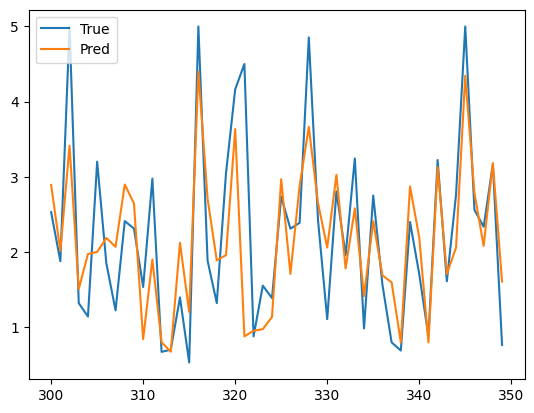

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from LinRegressions import LinRegress, plot_result

etalon = LinearRegression()
etalon.fit(X_train, y_train_scaled)
y_pred_scaled = etalon.predict(X_test)
mse_etalon = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_etalon = r2_score(y_test_scaled, y_pred_scaled)

print(f"MSE: {mse_etalon:.3f}")
print(f"R2: {r2_etalon:.3f}")

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)
plot_result(y_test, y_pred, (300, 350))

## Обучение своей модели с tau=0

MSE: 0.612
R2: 0.537


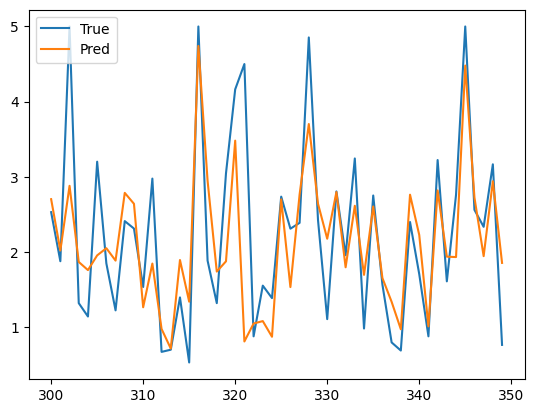

In [5]:
ridge_model = LinRegress(tau=0)
ridge_model.fit(X_train, y_train_scaled)
y_pred_scaled_ridge = ridge_model.predict(X_test)
y_pred_ridge = scaler_y.inverse_transform(y_pred_scaled_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MSE: {mse_ridge:.3f}")
print(f"R2: {r2_ridge:.3f}")
plot_result(y_test, y_pred_ridge, (300, 350))

## Обучение с подбором tau

Наилучший tau: 0.350
MSE: 0.589
R2: 0.555


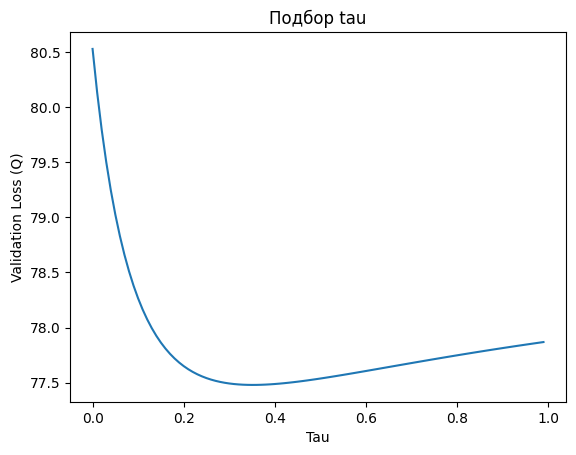

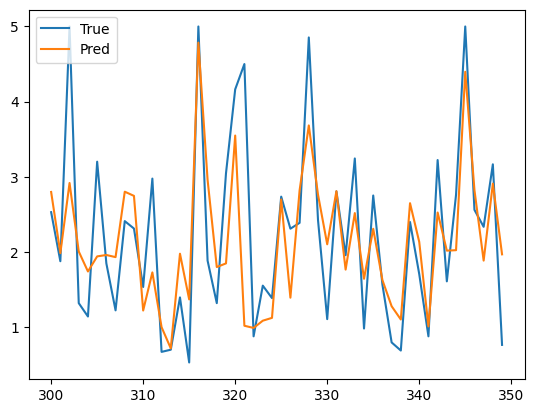

In [6]:
import matplotlib.pyplot as plt
import numpy as np

ridge_model_tuned = LinRegress()
tau_range = np.arange(0, 1, 0.01)
q_history = ridge_model_tuned.fit_tau(X_train, X_test, y_train_scaled, y_test_scaled, tau_range)
y_pred_scaled_tuned = ridge_model_tuned.predict(X_test)
y_pred_tuned = scaler_y.inverse_transform(y_pred_scaled_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Наилучший tau: {ridge_model_tuned.tau:.3f}")
print(f"MSE: {mse_tuned:.3f}")
print(f"R2: {r2_tuned:.3f}")
plt.plot(tau_range, q_history)
plt.xlabel('Tau')
plt.ylabel('Validation Loss (Q)')
plt.title('Подбор tau')
plt.show()

plot_result(y_test, y_pred_tuned, (300, 350))